In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [28]:
df = pd.read_csv('../data/alpha-2.csv')
df

,current_player,current_player_score,opponent_score,current_player_deadwood,current_player_num_hit_cards,is_current_player_hand_winner,is_current_player_game_winner
0,1,0,0,65,7,1,1
1,0,0,0,32,4,0,0
2,0,0,0,37,5,0,0
3,0,0,0,27,5,0,0
4,1,0,0,65,6,1,1
...,...,...,...,...,...,...,...
18613,1,35,93,34,7,0,0
18614,0,93,35,14,1,1,1
18615,0,93,35,16,5,1,1
18616,0,93,35,7,5,1,1


In [45]:
X = df[["current_player","current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards"]]
y = df[["is_current_player_game_winner"]]

In [46]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [47]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

[0.55269069]
[[ 0.0171567   0.00727256 -0.00728015 -0.0023491   0.00581623]]


In [48]:
linear_regressor.score(X, y)

0.22493977403973187

In [49]:
y_pred = linear_regressor.predict(X)
y_pred

array([[0.45786984],
       [0.50078458],
       [0.49485534],
       ...,
       [0.96572909],
       [0.98687095],
       [0.98687095]])

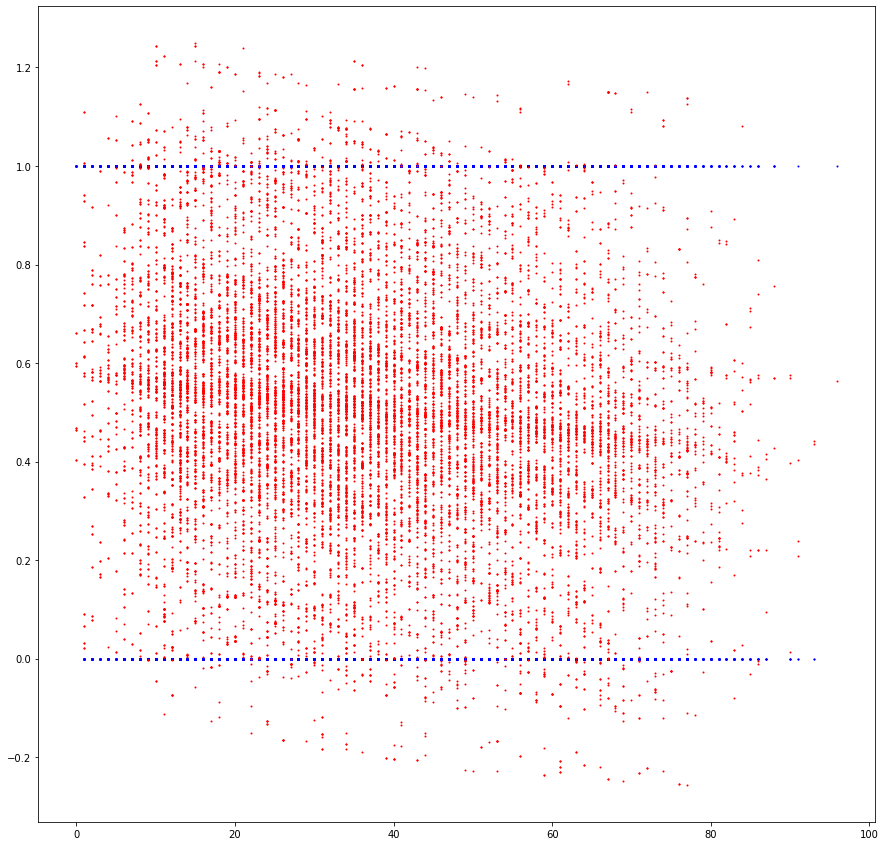

In [52]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X[['current_player_deadwood']], y_pred.T[0], s=1, color='red')
plt.show()

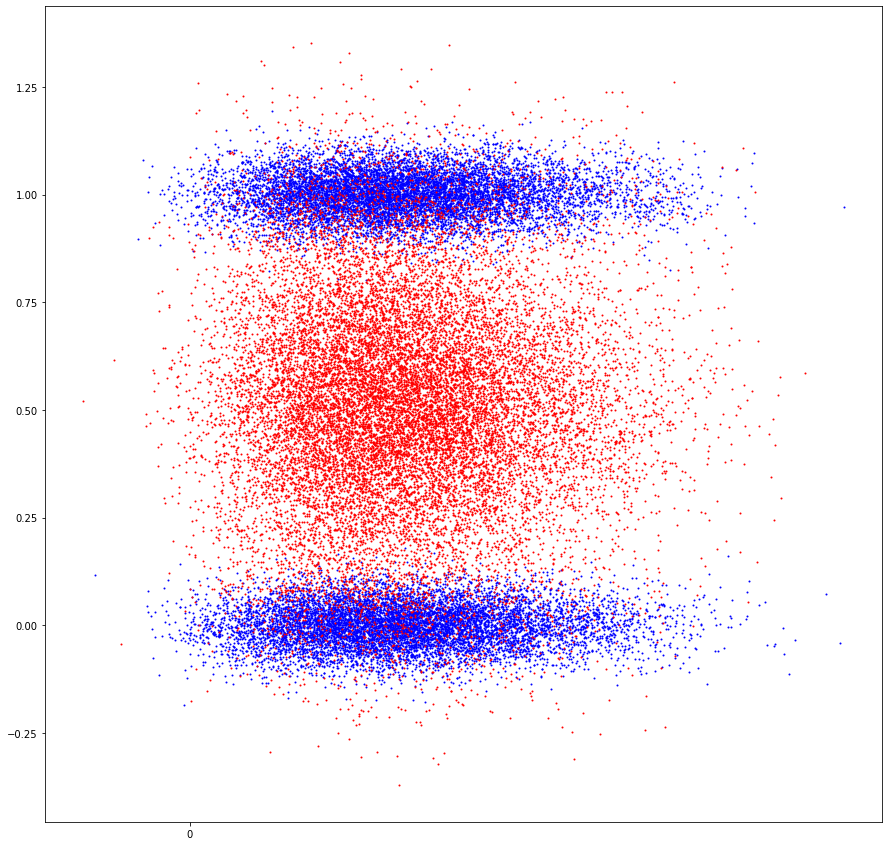

In [51]:
def jitter(arr):
    stdev = 0.05 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[['current_player_num_hit_cards']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[['current_player_num_hit_cards']].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

# logistic

In [13]:
X = df[["current_player","current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards"]]
y = df[["is_current_player_hand_winner"]] #, "is_current_player_game_winner"]]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

In [21]:
model = LogisticRegression().fit(X_train, y_train.values.T[0])

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions

array([1, 1, 0, ..., 0, 1, 0])

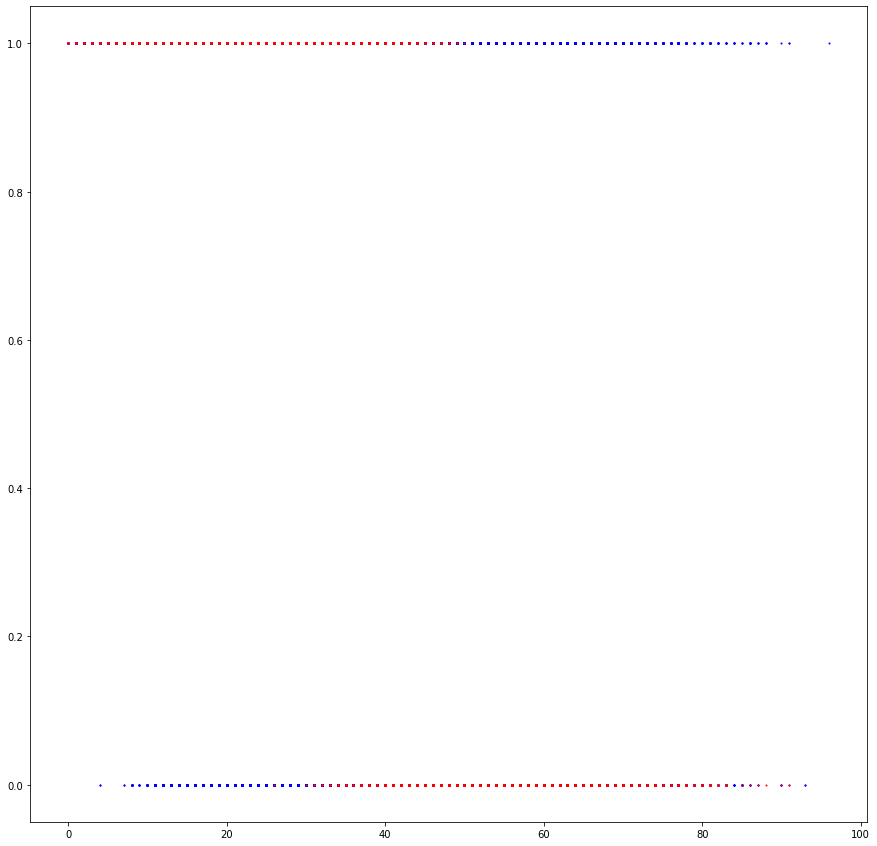

In [24]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_hand_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

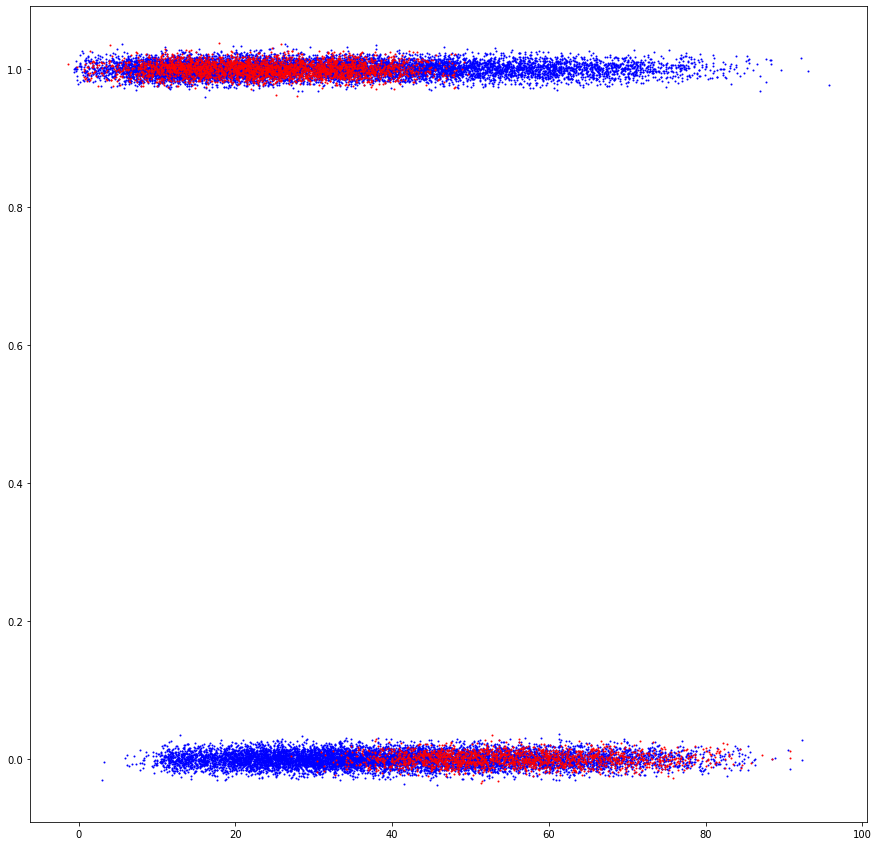

In [25]:
fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_hand_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()